In [1]:
import sys
sys.path.append('../../MembraneQuant')
from membranequant import *
import seaborn as sns
%matplotlib notebook

In [2]:
path_gcn4 = ['/Users/blandt/Desktop/Data/GCN4 fragment/210826_nwg383_tom4,5,60,500', 
            '/Users/blandt/Desktop/Data/GCN4 fragment/210826_nwg384_tom4,5,60,500']
paths_gcn4 = direcslist(path_gcn4, 0)
imgs_gcn4 = [load_image(p + '/af_corrected.tif') for p in paths_gcn4]
rois_gcn4 = [np.loadtxt(p + '/ROI_fit.txt') for p in paths_gcn4]
dosages_gcn4 = [dosage(i, r, 5) for i, r in zip(imgs_gcn4, rois_gcn4)]

path_ctrl = '/Users/blandt/Desktop/Data/T2A/210804_nwg378_tom4,5,60,500'
paths_ctrl = direcslist(path_ctrl, 0)
imgs_ctrl = [load_image(p + '/af_corrected.tif') for p in paths_ctrl]
rois_ctrl = [np.loadtxt(p + '/ROI_fit.txt') for p in paths_ctrl]
dosages_ctrl = [dosage(i, r, 5) for i, r in zip(imgs_ctrl, rois_ctrl)]

### Image

<IPython.core.display.Javascript object>


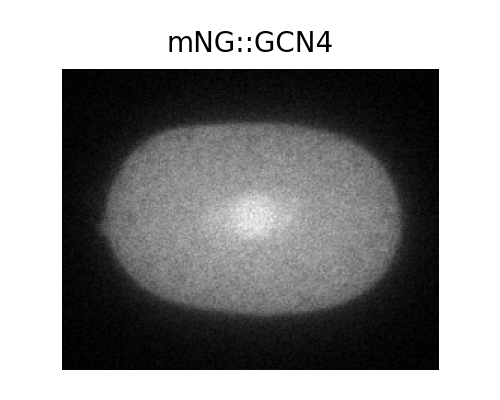

In [3]:
def func(path, ax):
    img = load_image(path + '/af_corrected.tif')
    roi = np.loadtxt(path + '/ROI.txt')
    rotated = rotated_embryo(img, roi, 250, 200, 3)
    ax.imshow(rotated, cmap='gray', vmin=0)
    ax.axis('off')
    
fig, ax = plt.subplots()
func(paths_gcn4[2], ax)
ax.set_title('mNG::GCN4', fontsize=10)
fig.set_size_inches(2.5, 2)
fig.tight_layout()
fig.savefig('Figs/img.png', dpi=600, transparent=True)

### Dosage

In [4]:
df = pd.DataFrame({'Label': ['mNG::GCN4'] * len(paths_gcn4) + ['mNG'] * len(paths_ctrl), 
                   'Dosage': dosages_gcn4 + dosages_ctrl})

<IPython.core.display.Javascript object>


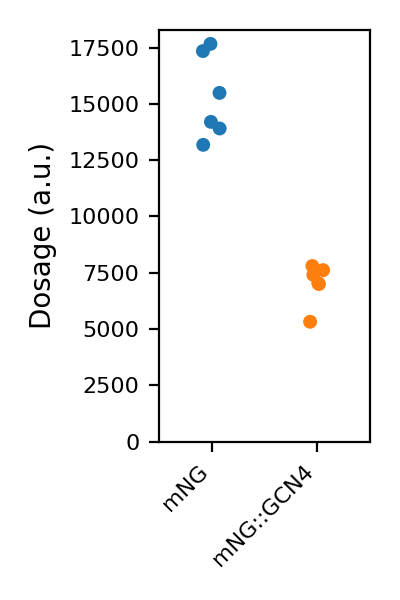

In [5]:
fig, ax = plt.subplots()
sns.stripplot(data=df, x='Label', y='Dosage', ax=ax, order=['mNG', 'mNG::GCN4'])
ax.tick_params(axis='x', labelsize=8)
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
    tick.set_horizontalalignment('right')
ax.tick_params(axis='y', labelsize=8)
ax.set_ylabel('Dosage (a.u.)')
ax.set_xlabel('')
ax.set_ylim(bottom=0)
fig.set_size_inches(2,3)
fig.tight_layout()
fig.savefig('Figs/dosage.png', dpi=600, transparent=True)